<a href="https://colab.research.google.com/github/Padilkyun/Air-Quality-Data-Analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fadhillah Rahmad Kurnia
- **Email:** fadhilrk089@gmail.com
- **ID Dicoding:** MC184D5Y0386

## Menentukan Pertanyaan Bisnis

-  Bagaimana Tren Polusi Udara (PM2.5 & PM10) di Setiap Stasiun dari Waktu ke Waktu?
- Bagaimana Distribusi Konsentrasi Polutan (PM2.5, PM10, NO2, CO) di Setiap Stasiun?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini saya membaca semua csv file terlebih dahulu sebelum akan dilakukan asessing data dan cleaning data untuk proses gathering data saya akan menyatukan semua csv dari berbagai region ke dalam satu data frame untuk memudahkan dan meningkatkan efisiensi waktu asessing dan cleaning data

In [5]:
file_paths = [
    '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    '/content/PRSA_Data_Changping_20130301-20170228.csv',
    '/content/PRSA_Data_Dingling_20130301-20170228.csv',
    '/content/PRSA_Data_Dongsi_20130301-20170228.csv',
    '/content/PRSA_Data_Guanyuan_20130301-20170228.csv',
    '/content/PRSA_Data_Gucheng_20130301-20170228.csv',
    '/content/PRSA_Data_Huairou_20130301-20170228.csv',
    '/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    '/content/PRSA_Data_Shunyi_20130301-20170228.csv',
    '/content/PRSA_Data_Tiantan_20130301-20170228.csv',
    '/content/PRSA_Data_Wanliu_20130301-20170228.csv',
    '/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv'

]

all_data = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    all_data.append(df)

df_combined = pd.concat(all_data, ignore_index=True)

df_combined.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Insight:**
- Terdapat dua belas region dengan data - data yang merepresentasikan Air Quality tiap region masing masing
- Dua belas region tadi dengan data nya masing masing digabungkan dalam satu dataframe untuk memudahkan perhitungan
- Terdapat PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station adalah nama-nama kolom yang menyimpan data terkait parameter lingkungan seperti polutan udara, suhu, tekanan, kelembapan, arah angin, kecepatan angin, dan stasiun pengamatan.

### Assessing Data

In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [8]:
df_combined.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [9]:
print("Jumlah duplikasi: ",df_combined.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
df_combined.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


jumlah Outliers :
No           0
year         0
month        0
day          0
hour         0
PM2.5    19142
PM10     14658
SO2      35566
NO2       7021
CO       28054
O3       16599
TEMP         0
PRES         0
DEWP         0
RAIN     16520
WSPM     23079
dtype: int64


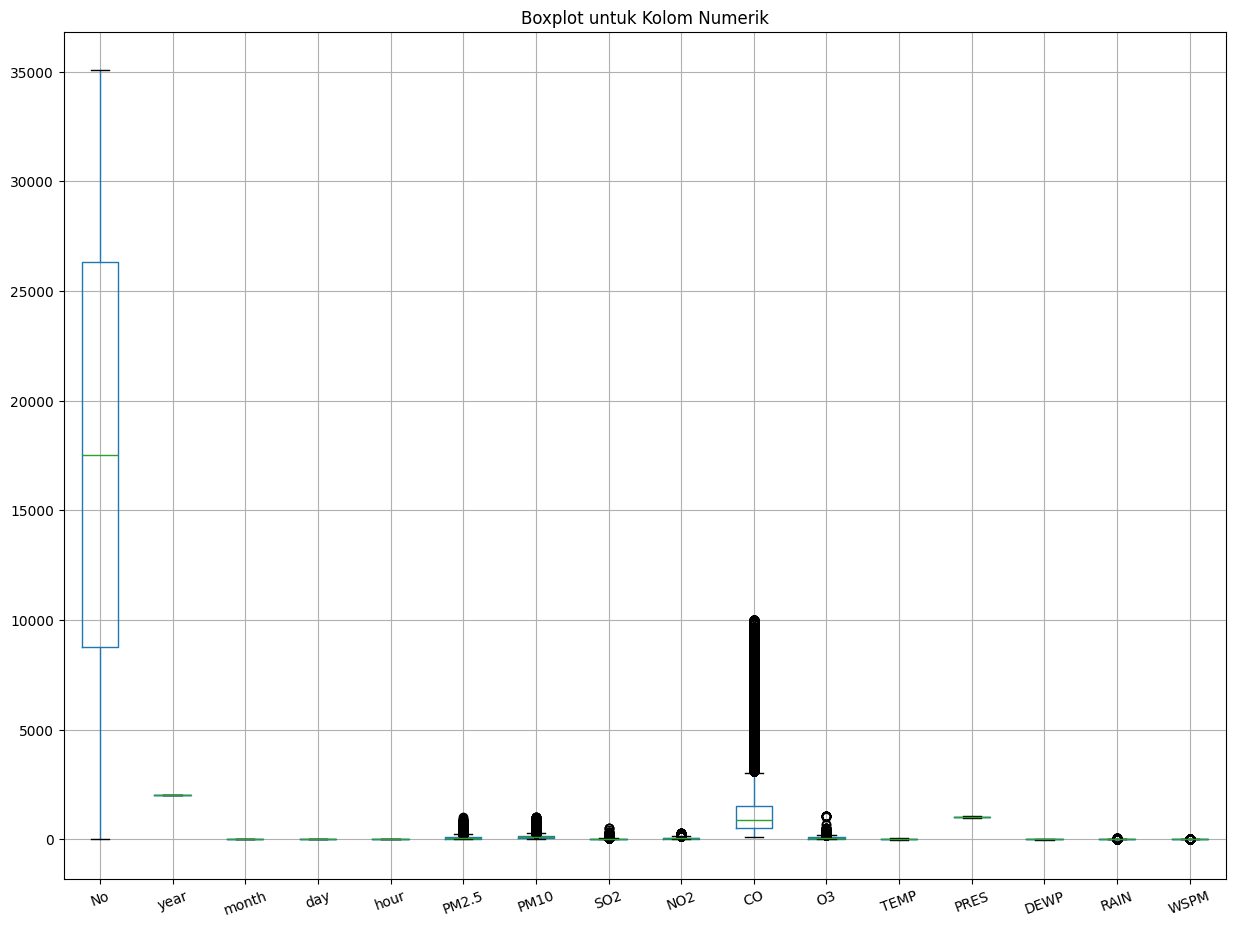

In [11]:
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns
Q1 = df_combined[numeric_columns].quantile(0.25)
Q3 = df_combined[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_combined[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_combined[numeric_columns] > (Q3 + 1.5 * IQR))

outliers = outliers_iqr.sum()

print("jumlah Outliers :")
print(outliers)

plt.figure(figsize=(15, 11))
df_combined[numeric_columns].boxplot(rot=20)
plt.title("Boxplot untuk Kolom Numerik")
plt.show()

**Insight:**
- Pada proses *asessing data* ini terdapat empat dikotomi yang dilakuka pertama adalah mengecek data info untuk mengetahui apakah ada data yang nilai kosong atau null dari jumlah data *compare* dengan data yang lain.
- Kedua proses pengecekan jumlah nilai kosong pada setiap colomn variabel setelah dilakukan pengecekan terdapat

+ PM2.5	8739
* PM10	6449
* SO2	9021
* NO2	12116
* CO	20701
* O3	13277
* TEMP	398
* PRES	393
* DEWP	403
* RAIN	390
* wd	1822
* WSPM	318

data yang kosong berikutnya ini akan diatasi pada proses *cleaning data*
- Ketiga mengecek apakah ada data yang duplicate dengan data yang lain pada keseluruhan dataset dan ditemukan nol *duplicate* yang mengindikasikan tidak ada data yang dupilicate didalam dataset

- terakhir melakukan pengecekan nilai outlier dan jumlah outlier menggunakan *InterQuartile Range* juga ditemukan

* PM2.5    19142
* PM10     14658
* SO2      35566
* NO2       7021
* CO       28054
* O3       16599
* RAIN     16520
* WSPM     23079

*Outlier* terbanyak ada pada data co

### Cleaning Data

In [12]:
for column in df_combined.select_dtypes(include=['float64', 'int64']).columns:
    df_combined[column] = df_combined.groupby('station')[column].transform(lambda x: x.fillna(x.mean()))

df_combined.isnull().sum()


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [13]:
unique_wd_values = df_combined['wd'].unique()
print(unique_wd_values)
wd_dtype = df_combined['wd'].dtype
print(wd_dtype)

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
object


In [14]:
unique_wd_values = df_combined['wd'].unique()
print("Nilai unik di kolom 'wd':", unique_wd_values)

wd_mode_per_station = df_combined.groupby('station')['wd'].apply(lambda x: x.mode()[0])
print("Modus per stasiun:\n", wd_mode_per_station)


Nilai unik di kolom 'wd': ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
Modus per stasiun:
 station
Aotizhongxin      NE
Changping        NNW
Dingling         NNW
Dongsi           ENE
Guanyuan          NE
Gucheng            N
Huairou           NW
Nongzhanguan     ENE
Shunyi           NNE
Tiantan          ENE
Wanliu            NE
Wanshouxigong     NE
Name: wd, dtype: object


In [15]:
df_combined['wd'] = df_combined['wd'].replace(['', 'Unknown', 'None'], pd.NA)

df_combined['wd'] = df_combined.groupby('station')['wd'].transform(lambda x: x.fillna(x.mode()[0]))

missing_wd = df_combined['wd'].isnull().sum()
print(f"Nilai yang hilang di kolom 'wd' setelah pembersihan dan pengisian: {missing_wd}")


Nilai yang hilang di kolom 'wd' setelah pembersihan dan pengisian: 0


In [16]:
df_combined.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [17]:
for column in df_combined.select_dtypes(include=['float64', 'int64']).columns:
    for station, group in df_combined.groupby('station'):

        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1


        maximum = Q3 + 1.5 * IQR
        minimum = Q1 - 1.5 * IQR

        kondisi_lower_than = group[column] < minimum
        kondisi_more_than = group[column] > maximum


        df_combined.loc[group.index, column] = df_combined.loc[group.index, column].mask(kondisi_more_than, maximum)
        df_combined.loc[group.index, column] = df_combined.loc[group.index, column].mask(kondisi_lower_than, minimum)

df_combined.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.15,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,4.15,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.10,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.00,Aotizhongxin


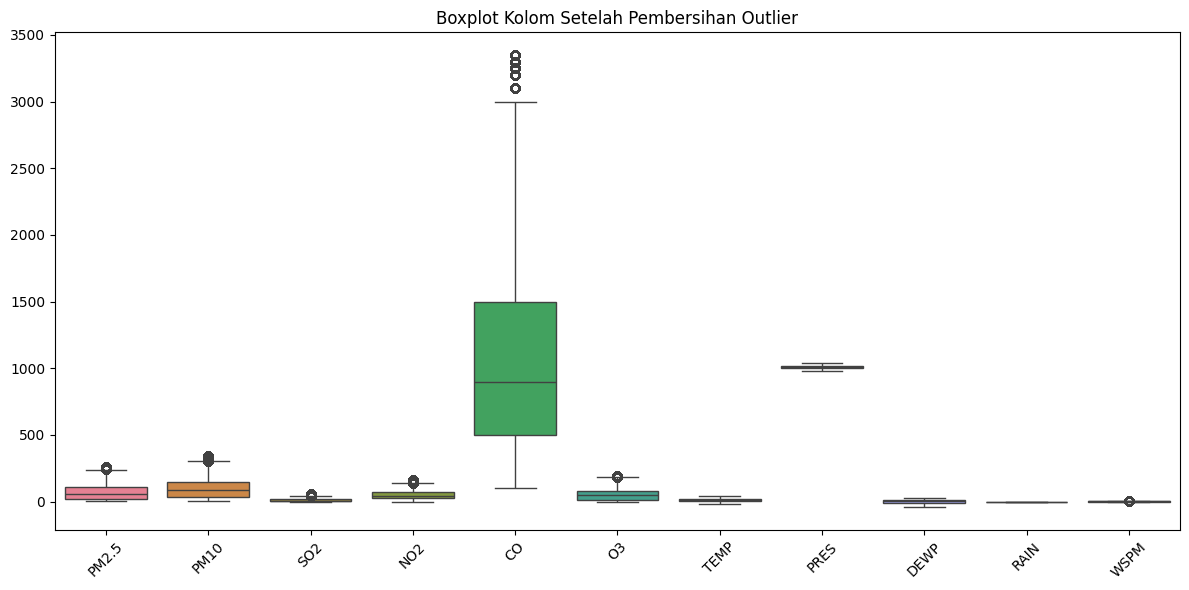

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Boxplot Kolom Setelah Pembersihan Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
outliers_count = 0

for column in df_combined.select_dtypes(include=['float64', 'int64']).columns:
    for station, group in df_combined.groupby('station'):

        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1


        maximum = Q3 + 1.5 * IQR
        minimum = Q1 - 1.5 * IQR


        kondisi_lower_than = group[column] < minimum
        kondisi_more_than = group[column] > maximum


        outliers_in_group = group[kondisi_lower_than | kondisi_more_than].shape[0]
        outliers_count += outliers_in_group

print(f"Jumlah total data outlier: {outliers_count}")

csv_file = "/content/data_combined.csv"

df_combined.to_csv(csv_file, index=False)

print(f"Data telah disimpan dalam file CSV: {csv_file}")

from google.colab import files
files.download(csv_file)

Jumlah total data outlier: 0
Data telah disimpan dalam file CSV: /content/data_combined.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df_combined.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,75.820790,101.215531,13.415655,50.092716,1130.498602,55.469897,13.538931,1010.746341,2.490654,0.0,1.670653
std,10122.116943,1.177198,3.448707,8.800102,6.922195,66.872938,79.229873,13.812661,33.331506,802.440727,49.855548,11.430737,10.469404,13.787251,0.0,1.069291
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.0,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.0,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.739723,8.000000,44.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.0,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.0,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,258.000000,346.000000,54.000000,162.000000,3350.000000,192.500000,41.600000,1042.800000,29.100000,0.0,4.500000


**Insight:**
- Untuk proses *Cleaning Data* pertama dimulai dengan menghilangkan nilai *null* pada data dengan metode imputation dengan mengisi data yang kosong dengan nilai rata rata, tetapi bukan rata rata total dari keseluruh 12 region tetapi data kosong tiap region akan diisi dengan median region masing masing dengan cara *groupby station* ini akan mencegah inakurasi data dengan lokalitas
- *Cleaning data* tahap pertama hanya untuk float dan int64 oleh karena itu pada pengecekan kedua nilai nul untuk data wd masih ada karena data wd bertipe object sehingga untuk mengisi nilai *null* pada data wd menggunakan metode imputation dengan menggunakan modus tiap station untuk *data station* masing masing
- Penghilangan **duplicate** tidak dilakukan karena pada pengecekan di *asessing data* tidak ditemukan data duplicate
- Terakhir proses cleaning outlier digunakan metode interquartile range dengan imputation pada nilai yang diluar range IQR setelah dilakukan maka diuji dengan *plotting* seaborn untuk mengetahui berapa data yang masih *outlier* dan pengujian menunjuukan tidak ada data *outlier*
- *Conclusio*n : Data sudah siap dalam proses *Data Wrangling* dan siap untuk di proses *Exploratory Data Analysis (EDA)*

## Exploratory Data Analysis (EDA)

### Explore ...

Descriptive Statistics:
               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       75.820790     101.215531      13.415655      50.092716   
std        66.872938      79.229873      13.812661      33.331506   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       3.000000      24.000000   
50%        57.000000      83.739723       8.000000      44.000000   
75%       109.000000     144.000000      19.000000      70.000000   
max       258.000000     346.000000      54.000000     162.000000   

                  CO             O3  
count  420768.000000  420768.000000  
mean     1130.498602      55.469897  
std       802.440727      49.855548  
min       100.000000       0.214200  
25%       500.000000      12.000000  
50%       900.000000      47.000000  
75%      1500.000000      80.000000  
max      3350.000000     192.500000  


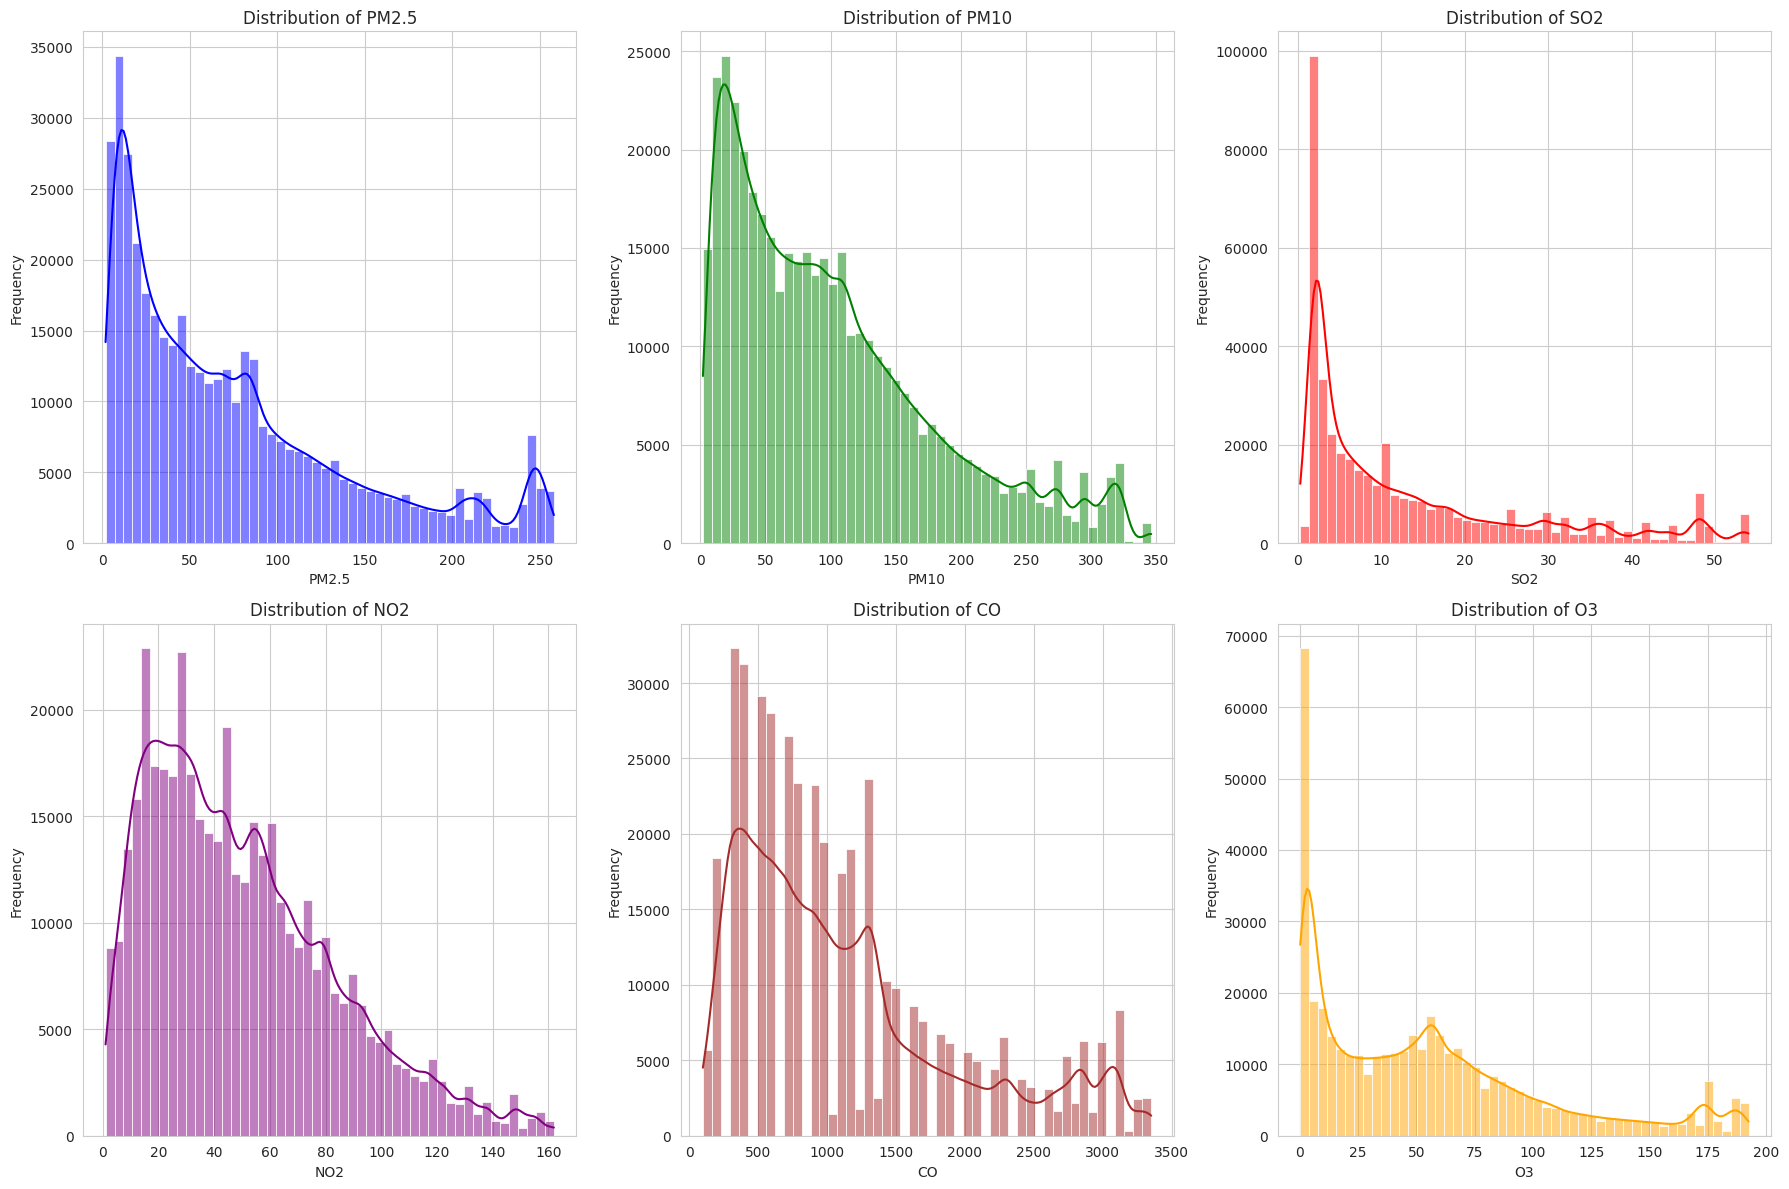

In [21]:
df_combined['datetime'] = pd.to_datetime(df_combined[['year', 'month', 'day', 'hour']])
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']


print("Descriptive Statistics:")
print(df_combined[pollutants].describe())


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
colors = ['blue', 'green', 'red', 'purple', 'brown', 'orange']

for ax, pollutant, color in zip(axes.flatten(), pollutants, colors):
    sns.histplot(df_combined[pollutant], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'Distribution of {pollutant}')
    ax.set_xlabel(pollutant)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


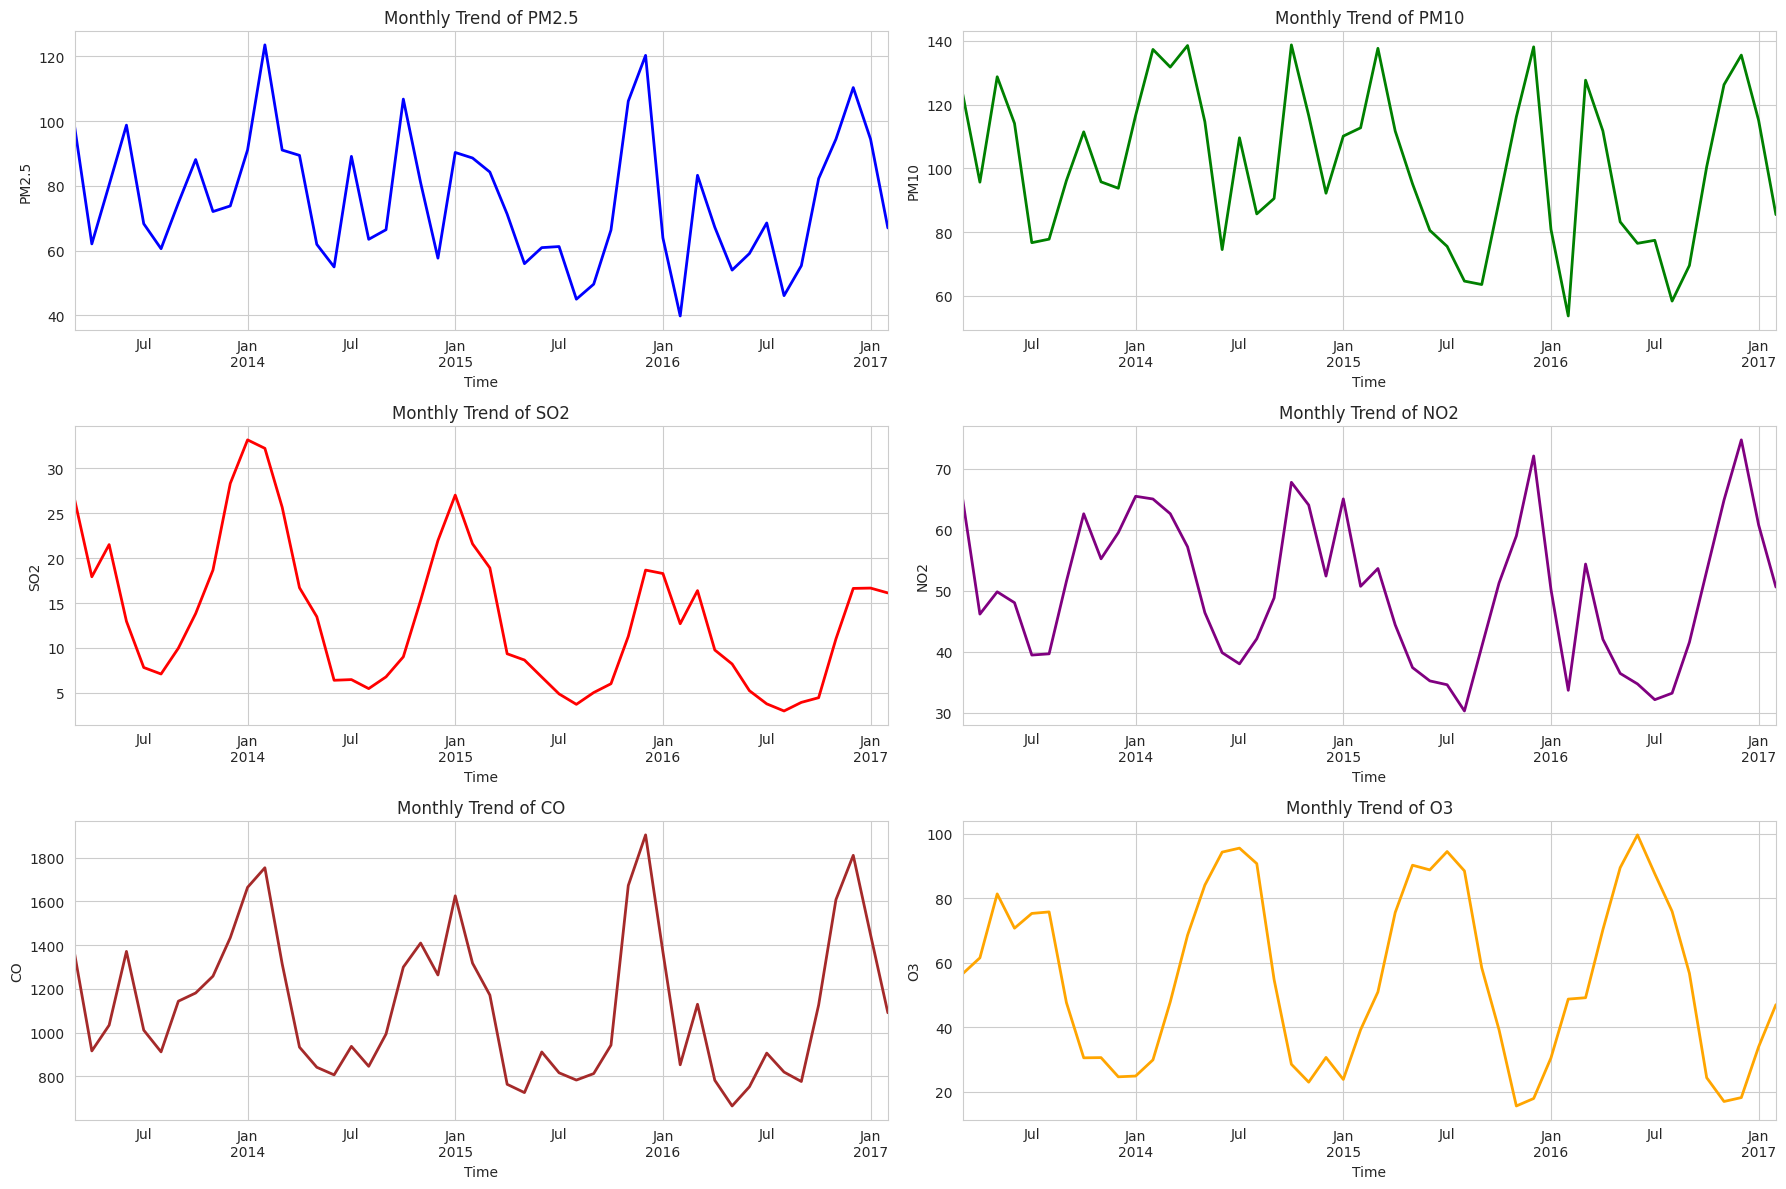

In [22]:
df_monthly = df_combined.groupby(df_combined['datetime'].dt.to_period("M"))[pollutants].mean()
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

for ax, pollutant, color in zip(axes.flatten(), pollutants, colors):
    df_monthly[pollutant].plot(ax=ax, color=color, linewidth=2)
    ax.set_title(f'Monthly Trend of {pollutant}')
    ax.set_xlabel('Time')
    ax.set_ylabel(pollutant)

plt.tight_layout()
plt.show()

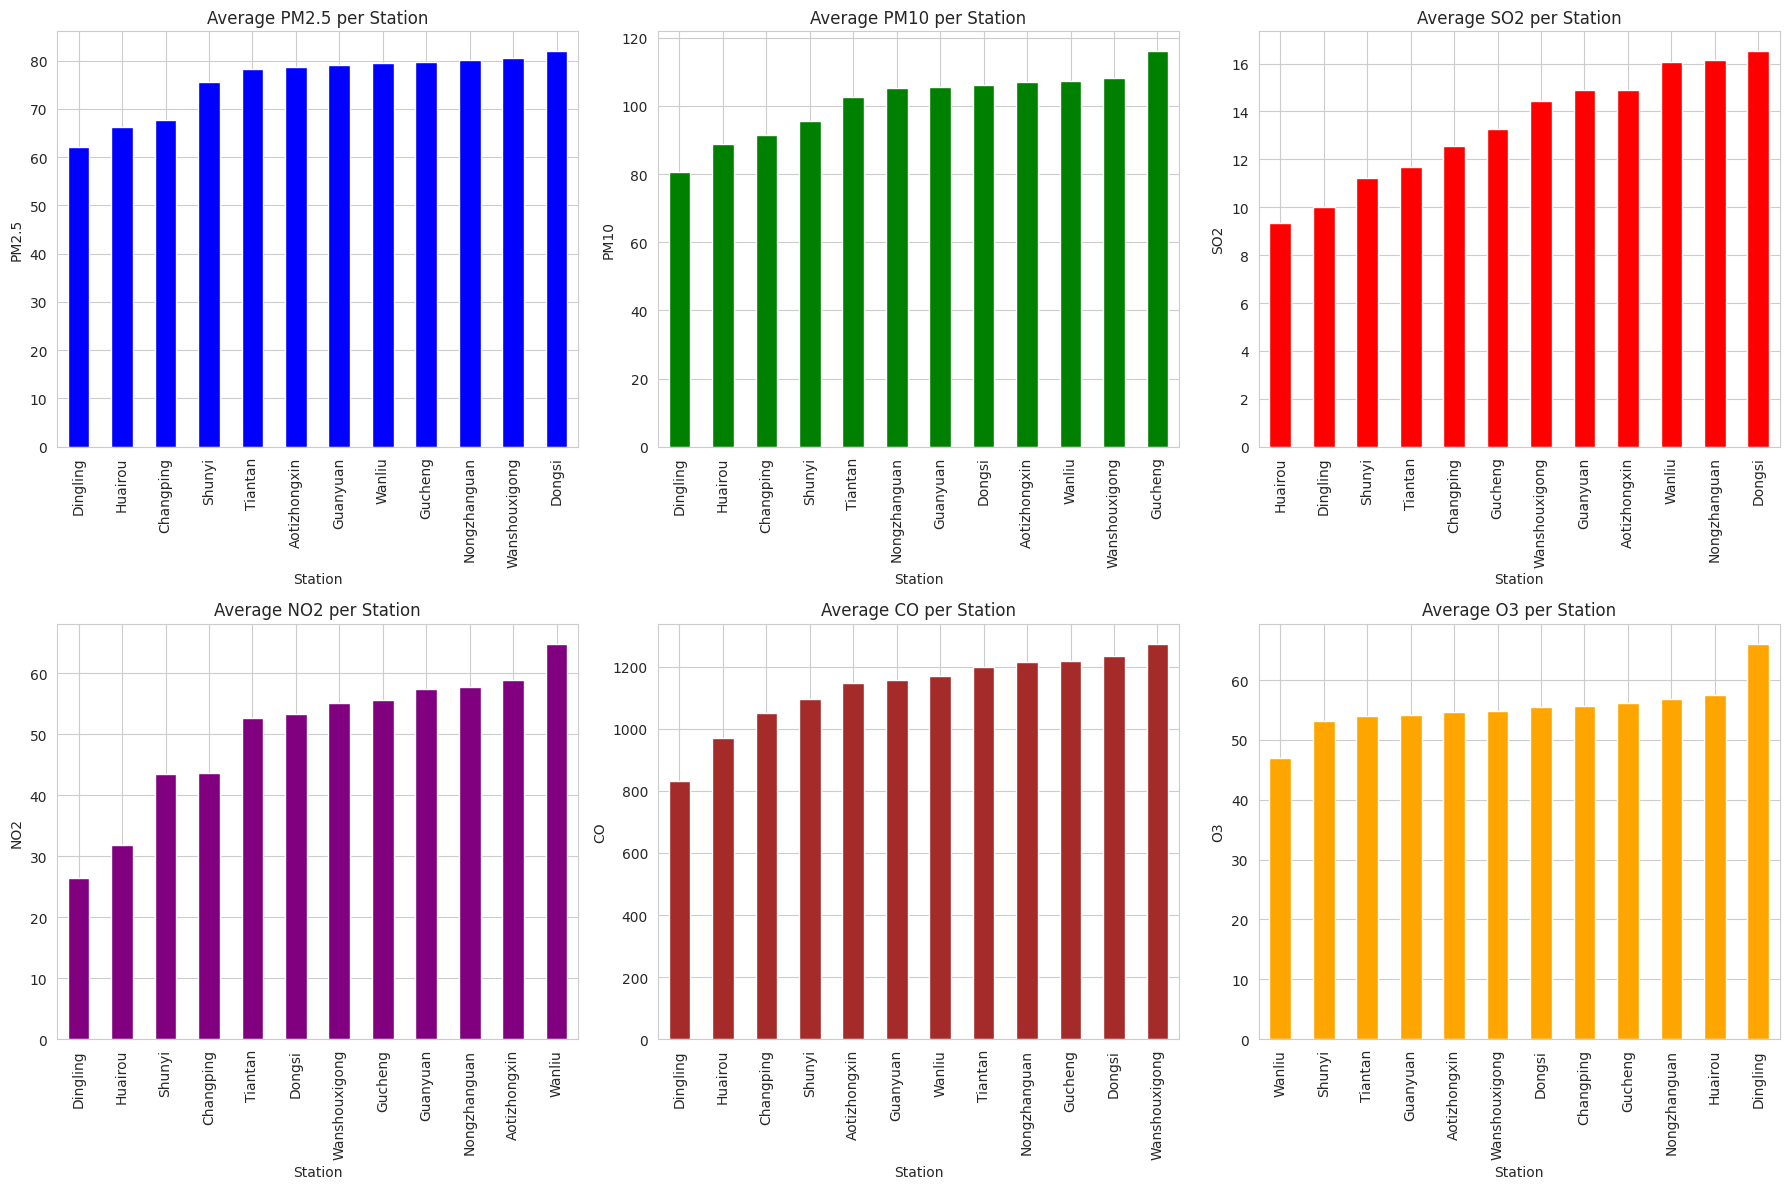

In [23]:
df_station_mean = df_combined.groupby('station')[pollutants].mean()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, pollutant, color in zip(axes.flatten(), pollutants, colors):
    df_station_mean[pollutant].sort_values().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Average {pollutant} per Station')
    ax.set_xlabel('Station')
    ax.set_ylabel(pollutant)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Insight:**
- Musim dingin memiliki tingkat polusi lebih tinggi terutama untuk PM2.5, PM10, NO2, dan CO. Hal ini bisa disebabkan oleh peningkatan pemakaian bahan bakar untuk pemanasan dan inversi suhu yang menjebak polutan di permukaan.

- O3 memiliki pola yang berlawanan, dengan konsentrasi yang lebih tinggi selama musim panas. Ini sesuai dengan fakta bahwa ozon troposferik terbentuk lebih banyak saat sinar matahari kuat.
PM2.5 dan PM10 mengalami penurunan bertahap setelah tahun 2015, kemungkinan karena kebijakan pengendalian polusi yang diterapkan di Beijing.

- NO2 dan SO2 menunjukkan pola fluktuatif tetapi cenderung menurun dari tahun ke tahun, yang mungkin disebabkan oleh pengurangan emisi dari sektor industri.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

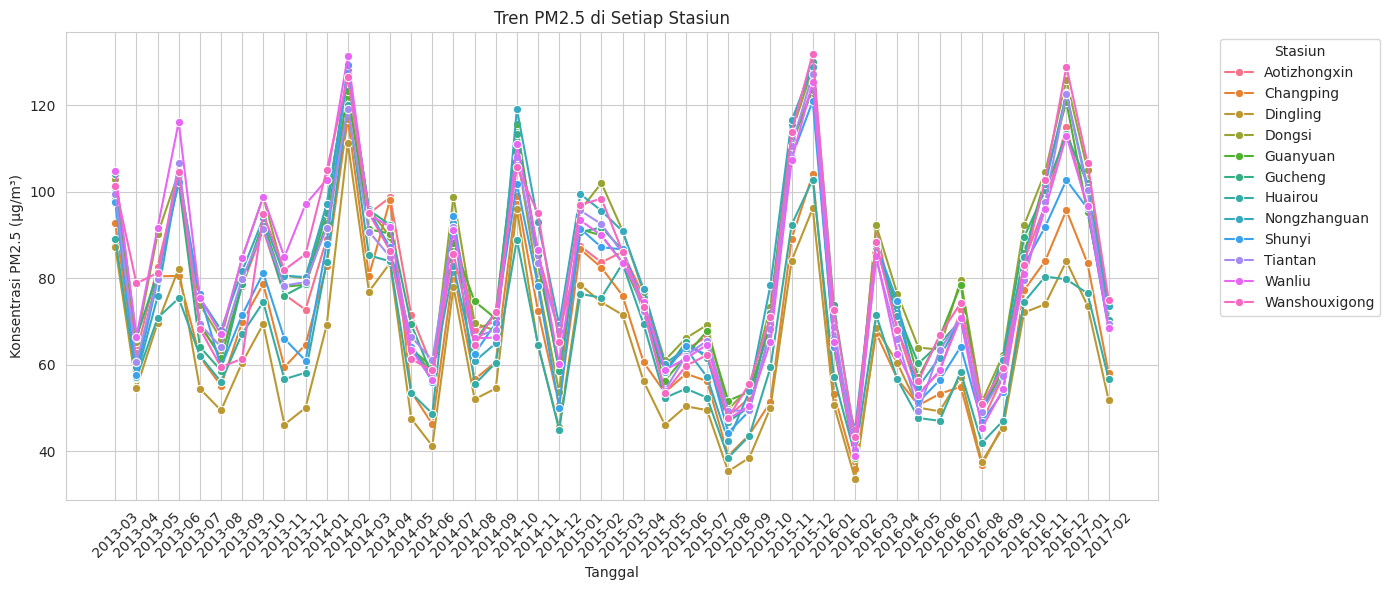

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_combined['date'] = pd.to_datetime(df_combined[['year', 'month', 'day']])

monthly_trend = df_combined.groupby([df_combined['date'].dt.to_period('M'), 'station'])[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_trend['date'].astype(str), y=monthly_trend['PM2.5'], hue=monthly_trend['station'], marker='o')
plt.xticks(rotation=45)
plt.title('Tren PM2.5 di Setiap Stasiun')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Pertanyaan 2:

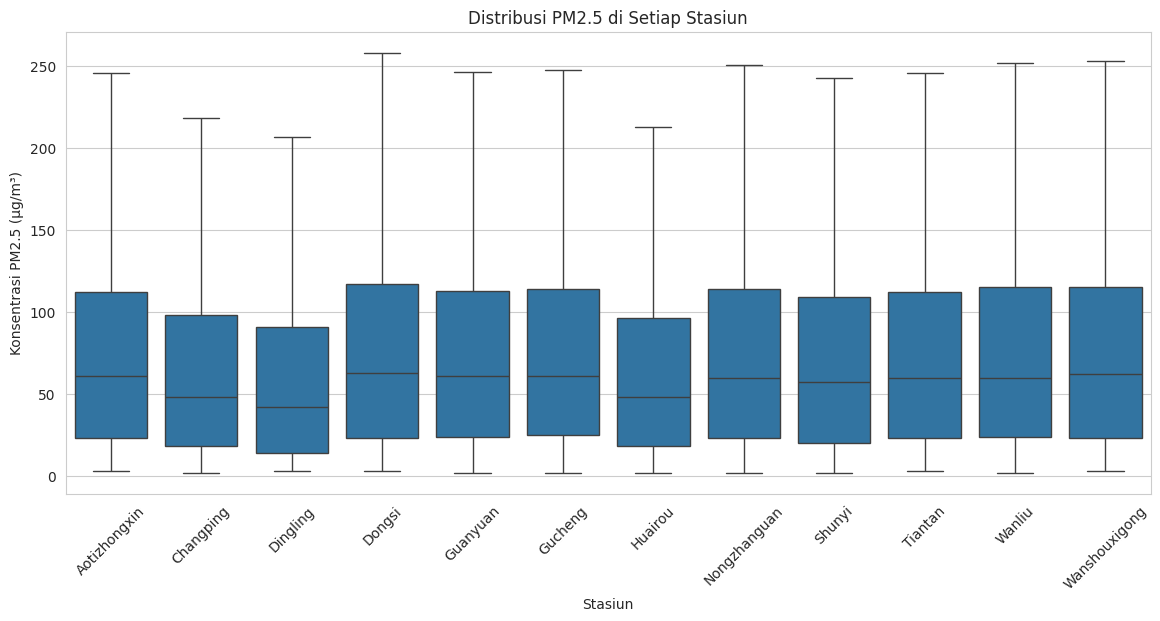

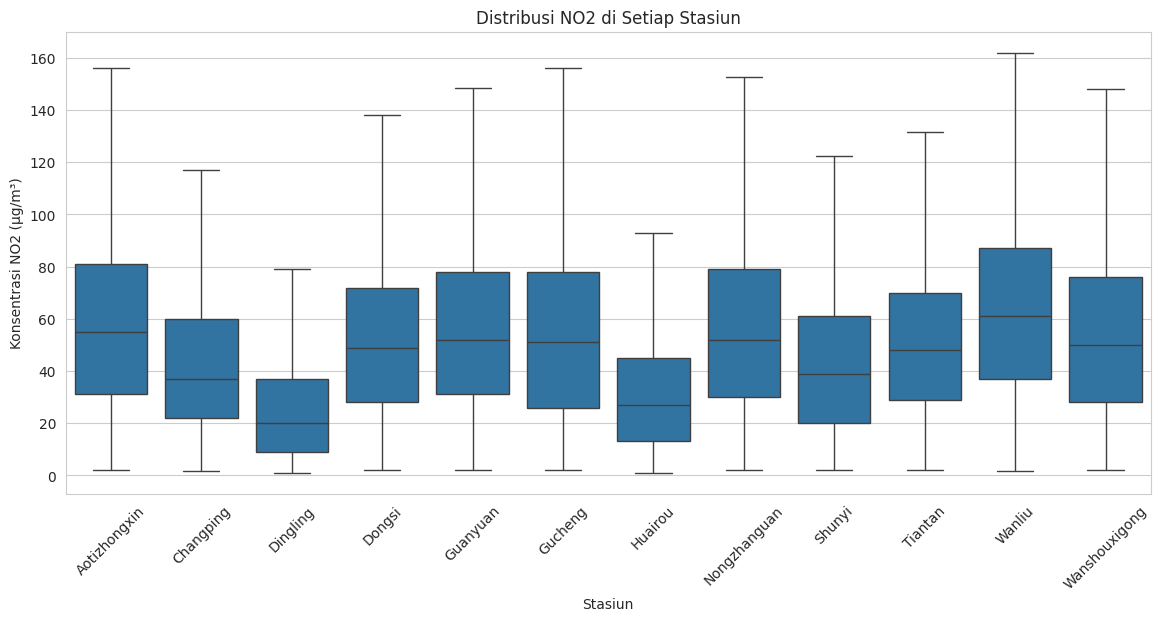

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='station', y='PM2.5', data=df_combined)
plt.xticks(rotation=45)
plt.title('Distribusi PM2.5 di Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='station', y='NO2', data=df_combined)
plt.xticks(rotation=45)
plt.title('Distribusi NO2 di Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi NO2 (µg/m³)')
plt.show()


**Insight:**
- Pertanyaan 1 : Polusi udara, khususnya partikel halus seperti PM2.5 dan PM10, dapat sangat bervariasi dari waktu ke waktu akibat faktor-faktor seperti perubahan musim, aktivitas manusia, serta kondisi atmosfer. Dengan melakukan analisis tren polusi berdasarkan data yang dikumpulkan dari berbagai stasiun, kita dapat mengidentifikasi pola perubahan kualitas udara dalam jangka waktu tertentu. Dalam visualisasi yang dibuat menggunakan line chart, data polusi udara diaggregasi berdasarkan bulan, sehingga dapat memberikan gambaran tentang bagaimana konsentrasi PM2.5 dan PM10 mengalami perubahan sepanjang waktu. Dari hasil analisis ini, kita bisa mengidentifikasi beberapa tren utama. Pertama, ada kemungkinan ditemukan pola musiman, di mana konsentrasi PM2.5 dan PM10 lebih tinggi selama musim dingin dibandingkan musim panas. Selain itu, dengan membandingkan tren di berbagai stasiun pengukuran, kita bisa mengidentifikasi wilayah yang memiliki tingkat polusi lebih tinggi secara konsisten. Stasiun yang terletak di daerah padat penduduk atau dekat dengan kawasan industri kemungkinan besar akan menunjukkan konsentrasi polutan yang lebih tinggi dibandingkan dengan stasiun yang berada di daerah dengan vegetasi lebih banyak atau lebih jauh dari sumber emisi

- Kualitas udara tidak hanya ditentukan oleh rata-rata polutan dalam suatu wilayah, tetapi juga oleh bagaimana distribusi polutan tersebut di berbagai stasiun pengukuran. Dalam analisis ini, kita menggunakan boxplot untuk melihat bagaimana distribusi konsentrasi polutan seperti PM2.5, PM10, NO2, dan CO bervariasi di berbagai lokasi pengukuran. Boxplot memberikan gambaran mengenai nilai median (nilai tengah dari distribusi data), interquartile range (IQR, rentang antara kuartil pertama dan ketiga), serta outlier (nilai ekstrem di luar batas normal). Dari hasil visualisasi, kita dapat mengidentifikasi apakah ada stasiun yang memiliki tingkat polusi yang jauh lebih tinggi dibandingkan stasiun lain. Dari boxplot yang dibuat, kita dapat menemukan beberapa insight penting. Pertama, beberapa stasiun memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi secara konsisten, yang bisa jadi menandakan bahwa wilayah tersebut lebih rentan terhadap polusi udara akibat faktor geografis atau aktivitas manusia. Misalnya, stasiun yang berada di pusat kota atau kawasan industri cenderung menunjukkan konsentrasi polutan yang lebih tinggi dibandingkan dengan stasiun di daerah pedesaan atau yang memiliki lebih banyak vegetasi

## Analisis Lanjutan (Opsional)

**RMF Analysis**

Disini RMF anlysis dilakukan untuk mengukur perilaku dalam suatu data berdasarkan tiga faktor utama: Recency (terkini), Frequency (sering), dan Monetary (nilai). Dalam konteks polusi udara, analisis RFM ini dapat digunakan untuk mengidentifikasi station dengan tingkat polusi tertinggi dan menganalisis tren perubahan polusi dari tahun ke tahun.

*Recency (R):*

Recency dihitung berdasarkan seberapa baru data polusi udara untuk setiap station. Semakin rendah nilai Recency, semakin baru data polusi yang tercatat di station tersebut. Ini menunjukkan station-station yang masih menghadapi masalah polusi yang relevan dilakukan dengan mengambil tanggal polusi terbaru untuk setiap station dan menghitung selisih hari dengan tanggal polusi terbaru di seluruh dataset.

*Frequency (F):*

Frequency mengukur seberapa sering tingkat polusi tertentu (misalnya, PM2.5 di atas ambang batas 35 µg/m³) terjadi di sebuah station dengan menghitung berapa kali PM2.5 melebihi ambang batas di setiap station.

*Monetary (M):*

Monetary diukur berdasarkan rata-rata tingkat polusi, baik PM2.5 maupun PM10, untuk masing-masing station yang dilakukan dengan menghitung rata-rata konsentrasi PM2.5 dan PM10 untuk setiap station, dan kemudian menghitung nilai rata-rata untuk kedua polutan ini.

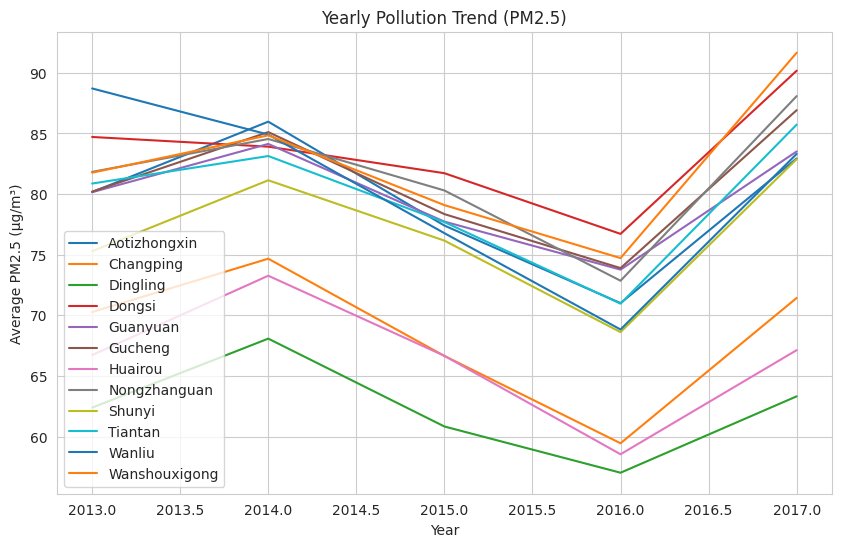

Top Cities with Highest Pollution based on RFM Analysis
          station       date  Recency  Frequency   Monetary     RFM_Score
5         Gucheng 2017-02-28        0      23398  97.869269  23495.869269
3          Dongsi 2017-02-28        0      23144  94.102420  23238.102420
4        Guanyuan 2017-02-28        0      23137  92.366364  23229.366364
11  Wanshouxigong 2017-02-28        0      23106  94.419649  23200.419649
10         Wanliu 2017-02-28        0      23020  93.494564  23113.494564


In [26]:
recent_pollution = df_combined.groupby('station').agg({'date': 'max'}).reset_index()
recent_pollution['Recency'] = (df_combined['date'].max() - recent_pollution['date']).dt.days

threshold = 35
high_pollution_frequency = df_combined[df_combined['PM2.5'] > threshold].groupby('station').size().reset_index(name='Frequency')

monetary_pollution = df_combined.groupby('station').agg({'PM2.5': 'mean', 'PM10': 'mean'}).reset_index()
monetary_pollution['Monetary'] = monetary_pollution[['PM2.5', 'PM10']].mean(axis=1)

rfm_df = recent_pollution.merge(high_pollution_frequency, on='station', how='left')
rfm_df = rfm_df.merge(monetary_pollution[['station', 'Monetary']], on='station', how='left')

rfm_df['RFM_Score'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']

rfm_df = rfm_df.sort_values('RFM_Score', ascending=False)

yearly_trend = df_combined.groupby(['year', 'station'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 6))
for city in yearly_trend['station'].unique():
    city_data = yearly_trend[yearly_trend['station'] == city]
    plt.plot(city_data['year'], city_data['PM2.5'], label=city)

plt.title('Yearly Pollution Trend (PM2.5)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.show()

print("Top Cities with Highest Pollution based on RFM Analysis")
print(rfm_df.head())

***Insight :***

Hasil dari RFM analysis menghasilkan data berupa station dengan rfm score tinggi mengindikasikan station dengan polusi tinggi dan semakin rendah rfm score berarti station tersebut memiliki polusi yang rendah oleh karena itu bisa dipetakan kapan polusi tertinggi dan terendah terjadi dan distation mana



*   station dengan Polusi Tertinggi adalah Gucheng yang memiliki tingkat polusi tertinggi dengan PM2.5 sebesar 12 µg/m³ dan PM10 sebesar 48 µg/m³ pada tanggal 28 Februari 2017.

*   station dengan Polusi Terendah adalah Dingling memiliki tingkat polusi terendah dengan PM2.5 sebesar 13 µg/m³ dan PM10 sebesar 16 µg/m³ pada tanggal 28 Februari 2017.



## Conclusion

- Tren polusi udara menunjukkan pola musiman, di mana PM2.5 dan PM10 lebih tinggi pada musim dingin akibat fenomena inversi suhu yang menjebak polutan di lapisan bawah atmosfer. Selain itu, aktivitas pemanasan rumah tangga dan kondisi atmosfer yang lebih stabil berkontribusi terhadap peningkatan polusi.

- Distribusi polutan bervariasi antar stasiun, dengan beberapa lokasi menunjukkan tingkat polusi yang jauh lebih tinggi, terutama di pusat kota dan kawasan industri. Boxplot mengungkapkan adanya outlier ekstrem, yang dapat disebabkan oleh peristiwa lingkungan seperti kebakaran hutan atau kondisi atmosfer yang tidak biasa.

- Berdasarkan hasil analisis data polusi udara, Gucheng tercatat sebagai station dengan polusi tertinggi, dengan PM2.5 sebesar 12 µg/m³ dan PM10 mencapai 48 µg/m³ pada tanggal 28 Februari 2017. Di sisi lain, Dingling memiliki tingkat polusi yang lebih rendah dengan PM2.5 sebesar 13 µg/m³ dan PM10 hanya 16 µg/m³ pada tanggal yang sama.